1.ETAPA DE CARGA E TRATAMENTO DE DADOS DA BASE DE VENDAS

In [11]:


import pandas as pd

# Carregando a base de dados
df = pd.read_csv(r'C:\Users\laris\Documents\PROJETOS PORTIFOLIO\projeto python potfólio\vendas_loja.csv')

# Verificando os primeiros registros
print("Primeiros registros:")
print(df.head())



Primeiros registros:
   ID_Produto         Categoria  Data_Venda  Preco_Unitario  \
0        1001  Eletrodomésticos  2023-01-15           450.0   
1        1002       Eletrônicos  2023-01-20          1200.0   
2        1003            Móveis  2023-02-10           150.0   
3        1004  Eletrodomésticos  2023-03-05           750.0   
4        1005       Eletrônicos  2023-04-25          2200.0   

   Quantidade_Vendida  Total_Venda    Regiao Cliente  
0                   2        900.0       Sul    João  
1                   1       1200.0   Sudeste   Maria  
2                   3        450.0  Nordeste  Carlos  
3                   1        750.0       Sul     Ana  
4                   1       2200.0  Nordeste   Pedro  


In [5]:
# Tratamento de valores nulos (caso existam)
print("\nVerificando valores nulos:")
print(df.isnull().sum())

# Preenchendo valores nulos (se necessário)
# df['Coluna'].fillna(0, inplace=True)  # Exemplo de preenchimento com 0



Verificando valores nulos:
ID_Produto            0
Categoria             0
Data_Venda            0
Preco_Unitario        0
Quantidade_Vendida    0
Total_Venda           0
Regiao                0
Cliente               0
dtype: int64


In [6]:
# Conversão de tipos (Ex: Data de Venda para datetime)
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'], format='%Y-%m-%d')


In [7]:
# Criando uma nova coluna para Mês e Ano da Venda
df['Mes_Venda'] = df['Data_Venda'].dt.month
df['Ano_Venda'] = df['Data_Venda'].dt.year


In [8]:
# Verificando valores duplicados
print("\nRegistros duplicados:")
print(df.duplicated().sum())


Registros duplicados:
0


In [9]:
# Removendo duplicados, se necessário
df.drop_duplicates(inplace=True)

# Exibindo o DataFrame tratado
print("\nDados tratados:")
print(df.head())


Dados tratados:
   ID_Produto         Categoria Data_Venda  Preco_Unitario  \
0        1001  Eletrodomésticos 2023-01-15           450.0   
1        1002       Eletrônicos 2023-01-20          1200.0   
2        1003            Móveis 2023-02-10           150.0   
3        1004  Eletrodomésticos 2023-03-05           750.0   
4        1005       Eletrônicos 2023-04-25          2200.0   

   Quantidade_Vendida  Total_Venda    Regiao Cliente  Mes_Venda  Ano_Venda  
0                   2        900.0       Sul    João          1       2023  
1                   1       1200.0   Sudeste   Maria          1       2023  
2                   3        450.0  Nordeste  Carlos          2       2023  
3                   1        750.0       Sul     Ana          3       2023  
4                   1       2200.0  Nordeste   Pedro          4       2023  


In [10]:
# Salvando o DataFrame tratado em um novo arquivo CSV
df.to_csv('vendas_loja_tratado.csv', index=False)

2.VISUALIZAÇÃO DOS DADOS TRATADOS

C:\Users\laris\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  del sys.path[0]


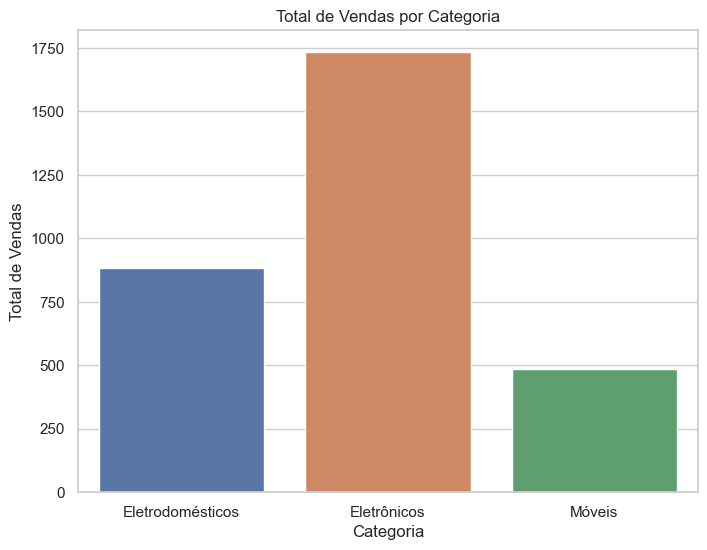

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados tratados
df = pd.read_csv('vendas_loja_tratado.csv')

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico 1: Total de vendas por categoria
plt.figure(figsize=(8, 6))
sns.barplot(x='Categoria', y='Total_Venda', data=df, ci=None)
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.show()



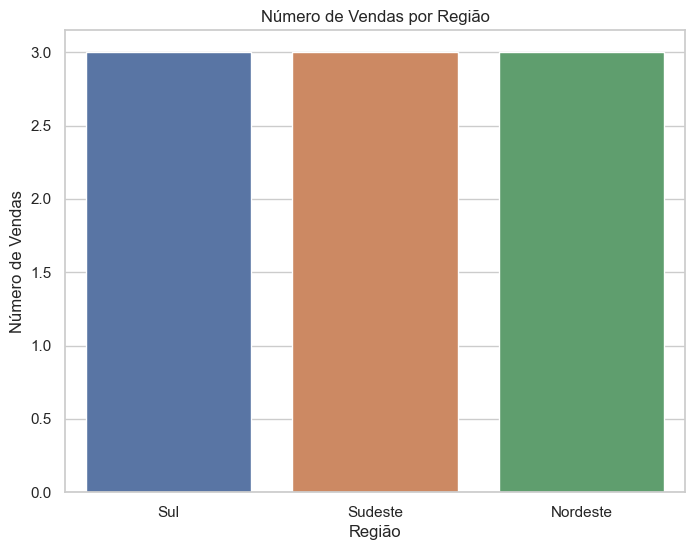

In [13]:


# Gráfico 2: Vendas por Região
plt.figure(figsize=(8, 6))
sns.countplot(x='Regiao', data=df)
plt.title('Número de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Número de Vendas')
plt.show()



C:\Users\laris\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  This is separate from the ipykernel package so we can avoid doing imports until


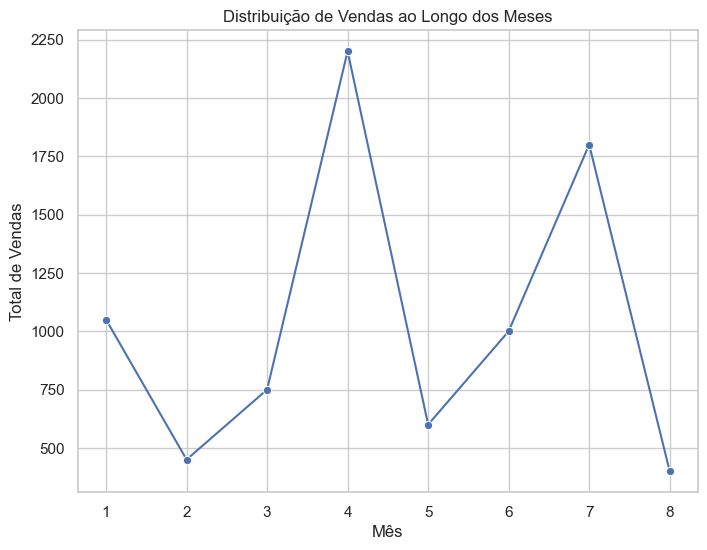

In [14]:


# Gráfico 3: Distribuição de Vendas ao longo dos meses
plt.figure(figsize=(8, 6))
sns.lineplot(x='Mes_Venda', y='Total_Venda', data=df, ci=None, marker="o")
plt.title('Distribuição de Vendas ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.show()


3.ANÁLISES EXPLORATÓRIAS

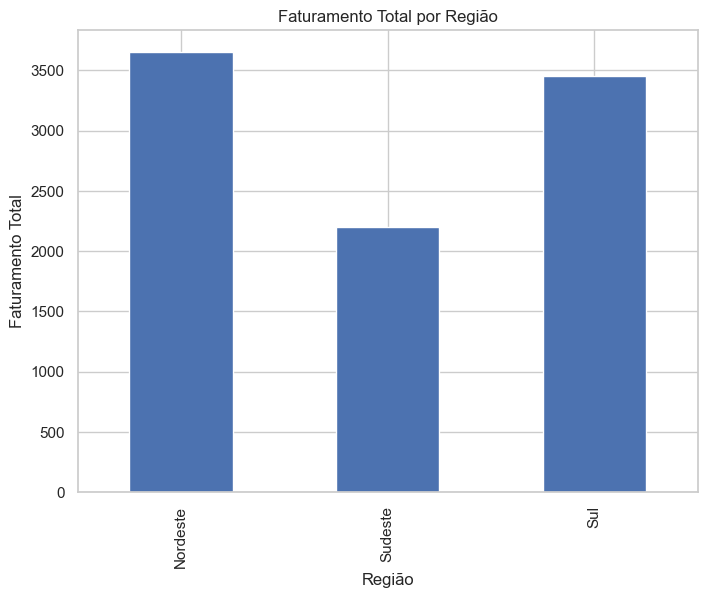

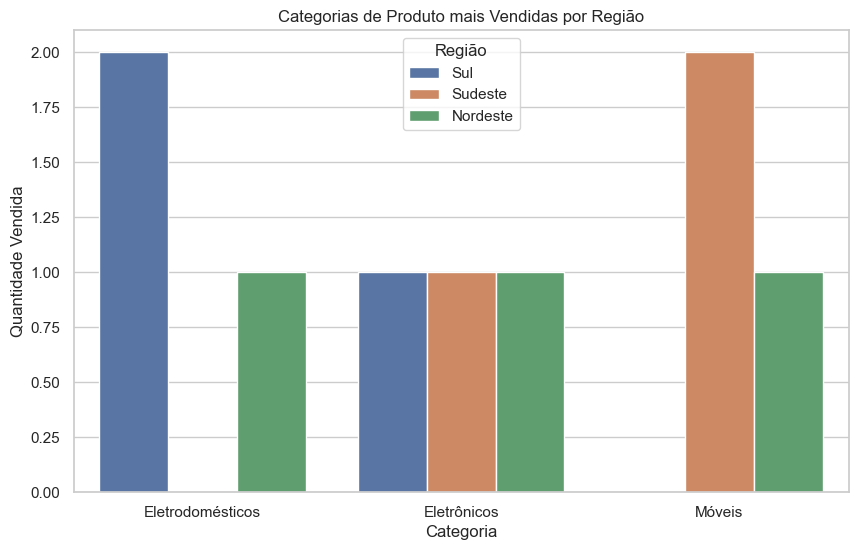

<Figure size 1000x600 with 0 Axes>

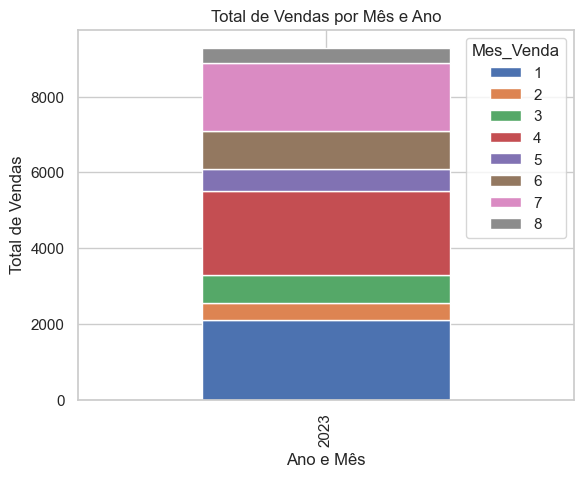

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados tratados
df = pd.read_csv('vendas_loja_tratado.csv')

# Gráfico 1: Faturamento total por região
plt.figure(figsize=(8, 6))
df.groupby('Regiao')['Total_Venda'].sum().plot(kind='bar')
plt.title('Faturamento Total por Região')
plt.xlabel('Região')
plt.ylabel('Faturamento Total')
plt.show()

# Gráfico 2: Categoria mais vendida por região
plt.figure(figsize=(10, 6))
sns.countplot(x='Categoria', hue='Regiao', data=df)
plt.title('Categorias de Produto mais Vendidas por Região')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.legend(title='Região')
plt.show()

# Gráfico 3: Total de vendas por mês e ano
plt.figure(figsize=(10, 6))
df.groupby(['Ano_Venda', 'Mes_Venda'])['Total_Venda'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Total de Vendas por Mês e Ano')
plt.xlabel('Ano e Mês')
plt.ylabel('Total de Vendas')
plt.show()
